In [1]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
df_Test= pd.get_dummies(df)
df=df_Test 

In [14]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

# MODEL

In [15]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [16]:
model = Sequential()
model.add(Dense(512, input_dim=len(X.columns), activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [17]:
 model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])


In [20]:
history = model.fit(X_train, y_train, 
                epochs=200,
                 batch_size=256) 

Epoch 1/200
3/3 [==============================] - 0s 20ms/step - loss: 0.3746 - accuracy: 0.8828
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3939 - accuracy: 0.8719
Epoch 3/200
3/3 [==============================] - 0s 34ms/step - loss: 0.3671 - accuracy: 0.8937
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3608 - accuracy: 0.8978
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.9033
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.9033
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.9046
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.9060
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.9005
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8896
Epoch 11/200
3/3 [========

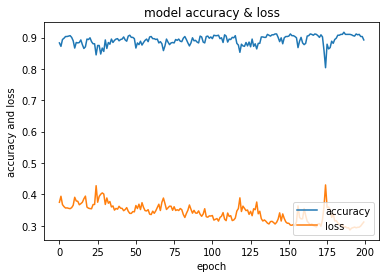

In [21]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()

In [23]:
#Save the model
model.save("ANN_HeartF.model")

INFO:tensorflow:Assets written to: ANN_HeartF.model\assets


In [24]:
model = load_model("ANN_HeartF.model")
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
scores = model.evaluate(X_test, y_test)
print()
print("Scores    : loss = ", scores[0], " acc = ", scores[1]*100)
print("---------------------------------------------------------")
print()

6/6 [==============================] - 0s 10ms/step - loss: 0.5492 - accuracy: 0.8370

Scores    : loss =  0.5492329597473145  acc =  83.69565010070801
---------------------------------------------------------

